In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from random import randint

In [81]:
x_train = pd.read_csv("ScaledTrainingData.csv")
x_test = pd.read_csv("ScaledTestData.csv")

y_train = pd.read_csv("UnscaledTrainigData.csv").values.ravel()
y_test = pd.read_csv("UnscaledTestData.csv").values.ravel()

In [82]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [83]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 131.99
RMSE: 225.13
R² Score: 0.88


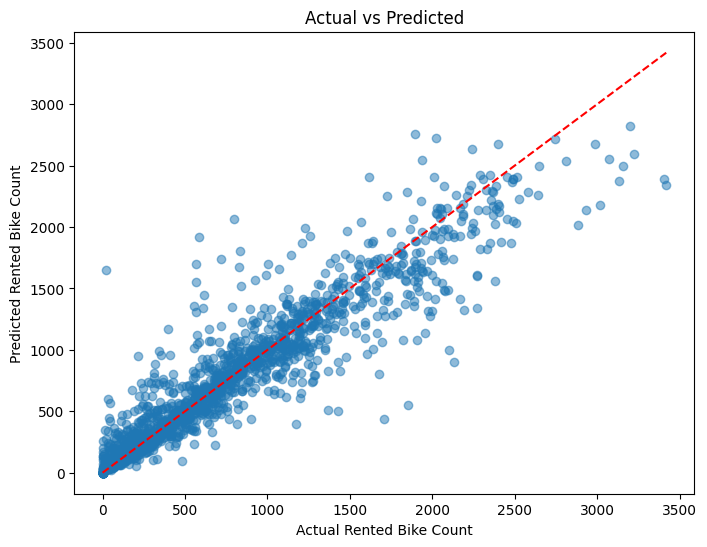

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual vs Predicted")
plt.show()


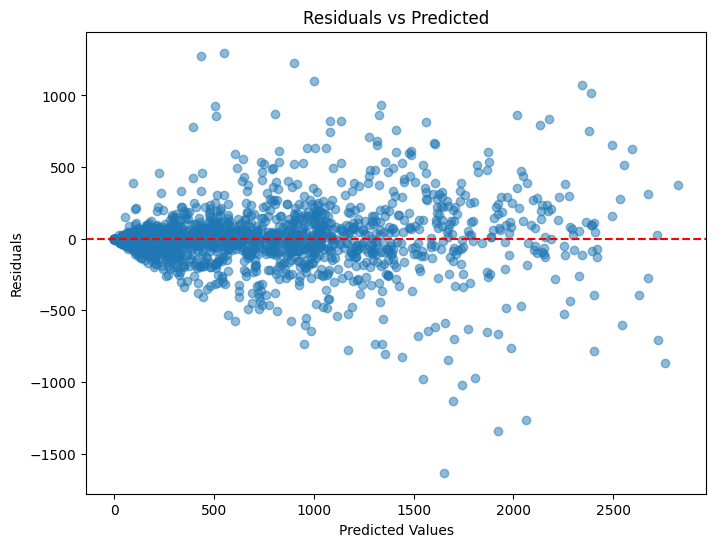

In [85]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

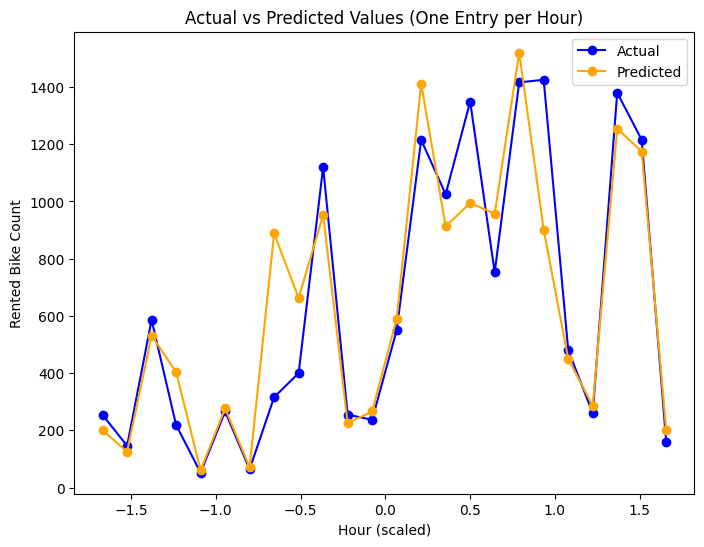

In [97]:
hours = x_test['Hour']

unique_hour_indices = hours.groupby(hours).apply(lambda x: x.index[randint(0,len(x)-1)]).values

plt.figure(figsize=(8, 6))
plt.plot(hours.iloc[unique_hour_indices], y_test[unique_hour_indices], color='blue', marker='o', label='Actual')
plt.plot(hours.iloc[unique_hour_indices], y_pred[unique_hour_indices], color='orange', marker='o', label='Predicted')
plt.xlabel("Hour (scaled)")
plt.ylabel("Rented Bike Count")
plt.title("Actual vs Predicted Values (One Entry per Hour)")
plt.legend()
plt.show()